In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('results_mixed_infidelity.csv')
# Replace all the Nans with 0s
df = df.fillna(0)

df = df[df["Dataset"] == "Imagenettewoof"]

In [2]:
methods = df["Attribution Method"].unique()
layers = df["Layer"].unique()
metrics = df["Metric"].unique()
upscale_methods = df["Upscale Method"].unique()
mixing_methods = df["Mixing Method"].unique()

In [3]:
print("Methods:", methods)
print("Layers:", layers)
print("Metrics:", metrics)
print("Upscale Methods:", upscale_methods)
print("Mixing Methods:", mixing_methods)

Methods: ['GradCAMPlusPlus']
Layers: ['features.20' 'features.15' 'features.10' 'features.5']
Metrics: ['infidelity']
Upscale Methods: ['ERFUpsamplingFast' 'bilinearUpsampling']
Mixing Methods: [0 'MultiplierMix']


In [4]:
df

,Image Index,Label,Predicted Label,Model,Dataset,Attribution Method,Layer,Metric,Upscale Method,Mixing Method,Value
0,0,2,2,VGG11,Imagenettewoof,GradCAMPlusPlus,features.20,infidelity,ERFUpsamplingFast,0,0.117073
1,0,2,2,VGG11,Imagenettewoof,GradCAMPlusPlus,features.20,infidelity,ERFUpsamplingFast,MultiplierMix,0.188425
2,0,2,2,VGG11,Imagenettewoof,GradCAMPlusPlus,features.15,infidelity,ERFUpsamplingFast,0,0.243148
3,0,2,2,VGG11,Imagenettewoof,GradCAMPlusPlus,features.15,infidelity,ERFUpsamplingFast,MultiplierMix,0.029485
4,0,2,2,VGG11,Imagenettewoof,GradCAMPlusPlus,features.10,infidelity,ERFUpsamplingFast,0,0.044777
...,...,...,...,...,...,...,...,...,...,...,...
15995,999,19,19,VGG11,Imagenettewoof,GradCAMPlusPlus,features.15,infidelity,bilinearUpsampling,MultiplierMix,0.018961
15996,999,19,19,VGG11,Imagenettewoof,GradCAMPlusPlus,features.10,infidelity,bilinearUpsampling,0,0.041226
15997,999,19,19,VGG11,Imagenettewoof,GradCAMPlusPlus,features.10,infidelity,bilinearUpsampling,MultiplierMix,0.005322
15998,999,19,19,VGG11,Imagenettewoof,GradCAMPlusPlus,features.5,infidelity,bilinearUpsampling,0,0.128909


In [5]:
import sys
sys.path.append('../')

from models import vgg11_Imagenettewoof, vgg_preprocess
import torch
from data import imagenettewoof
model = vgg11_Imagenettewoof()
# Load weights
model.load_state_dict(torch.load("VGG11_Imagenettewoof.pt", map_location='cpu'))

# test_data = imagenettewoof(root="../data", split="test", size="320px", download=False, transform=vgg_preprocess)

layer_types = {}
types = []
for i, layer in enumerate(layers):
    layer_type = model.features[int(layer.split(".")[-1])].__class__.__name__
    layer_types[layer] = layer_type
    if layer_type not in types:
        types.append(layer_type)

print(types)
print(layer_types)

['MaxPool2d']
{'features.20': 'MaxPool2d', 'features.15': 'MaxPool2d', 'features.10': 'MaxPool2d', 'features.5': 'MaxPool2d'}


In [6]:
df[(df["Upscale Method"] == "ERFUpsamplingFast")].groupby(["Mixing Method", "Layer"]).agg({"Value": ["mean","std", "count"]}).reset_index()

Mixing Method        Layer     Value                
                                   mean       std count
0              0  features.10  0.169412  0.076246  1000
1              0  features.15  0.169430  0.077191  1000
2              0  features.20  0.184744  0.084667  1000
3              0   features.5  0.159196  0.071179  1000
4  MultiplierMix  features.10  0.028142  0.024931  1000
5  MultiplierMix  features.15  0.078087  0.045680  1000
6  MultiplierMix  features.20  0.188565  0.085789  1000
7  MultiplierMix   features.5  0.010837  0.013140  1000

In [8]:
df_correct = df[df["Predicted Label"] == df["Label"]]
print(len(df), len(df_correct))

display(df[(df["Upscale Method"] == "bilinearUpsampling")].groupby(["Mixing Method", "Layer"]).agg({"Value": ["mean","std"]}).reset_index())
display(df_correct[(df_correct["Upscale Method"] == "bilinearUpsampling")].groupby(["Mixing Method", "Layer"]).agg({"Value": ["mean","std"]}).reset_index())


16028 12049


Mixing Method        Layer     Value          
                                   mean       std
0              0  features.10  0.163048  0.158390
1              0  features.15  0.217037  0.156425
2              0  features.20  0.245725  0.155758
3              0   features.5  0.150843  0.171168
4  MultiplierMix  features.10  0.240444  0.159742
5  MultiplierMix  features.15  0.248108  0.157553
6  MultiplierMix  features.20  0.245864  0.155770
7  MultiplierMix   features.5  0.232496  0.166342

Mixing Method        Layer     Value          
                                   mean       std
0              0  features.10  0.213841  0.140422
1              0  features.15  0.272199  0.131931
2              0  features.20  0.301862  0.126396
3              0   features.5  0.200632  0.161045
4  MultiplierMix  features.10  0.301938  0.125211
5  MultiplierMix  features.15  0.306860  0.125290
6  MultiplierMix  features.20  0.302123  0.126284
7  MultiplierMix   features.5  0.296295  0.131084

ERFUpsamplingFast
MultiIndex([('Layer',      ''),
            ('Value',  'mean'),
            ('Value',   'std'),
            ('Value', 'count')],
           )
MultiIndex([('Layer',      ''),
            ('Value',  'mean'),
            ('Value',   'std'),
            ('Value', 'count')],
           )
bilinearUpsampling
MultiIndex([('Layer',      ''),
            ('Value',  'mean'),
            ('Value',   'std'),
            ('Value', 'count')],
           )
MultiIndex([('Layer',      ''),
            ('Value',  'mean'),
            ('Value',   'std'),
            ('Value', 'count')],
           )


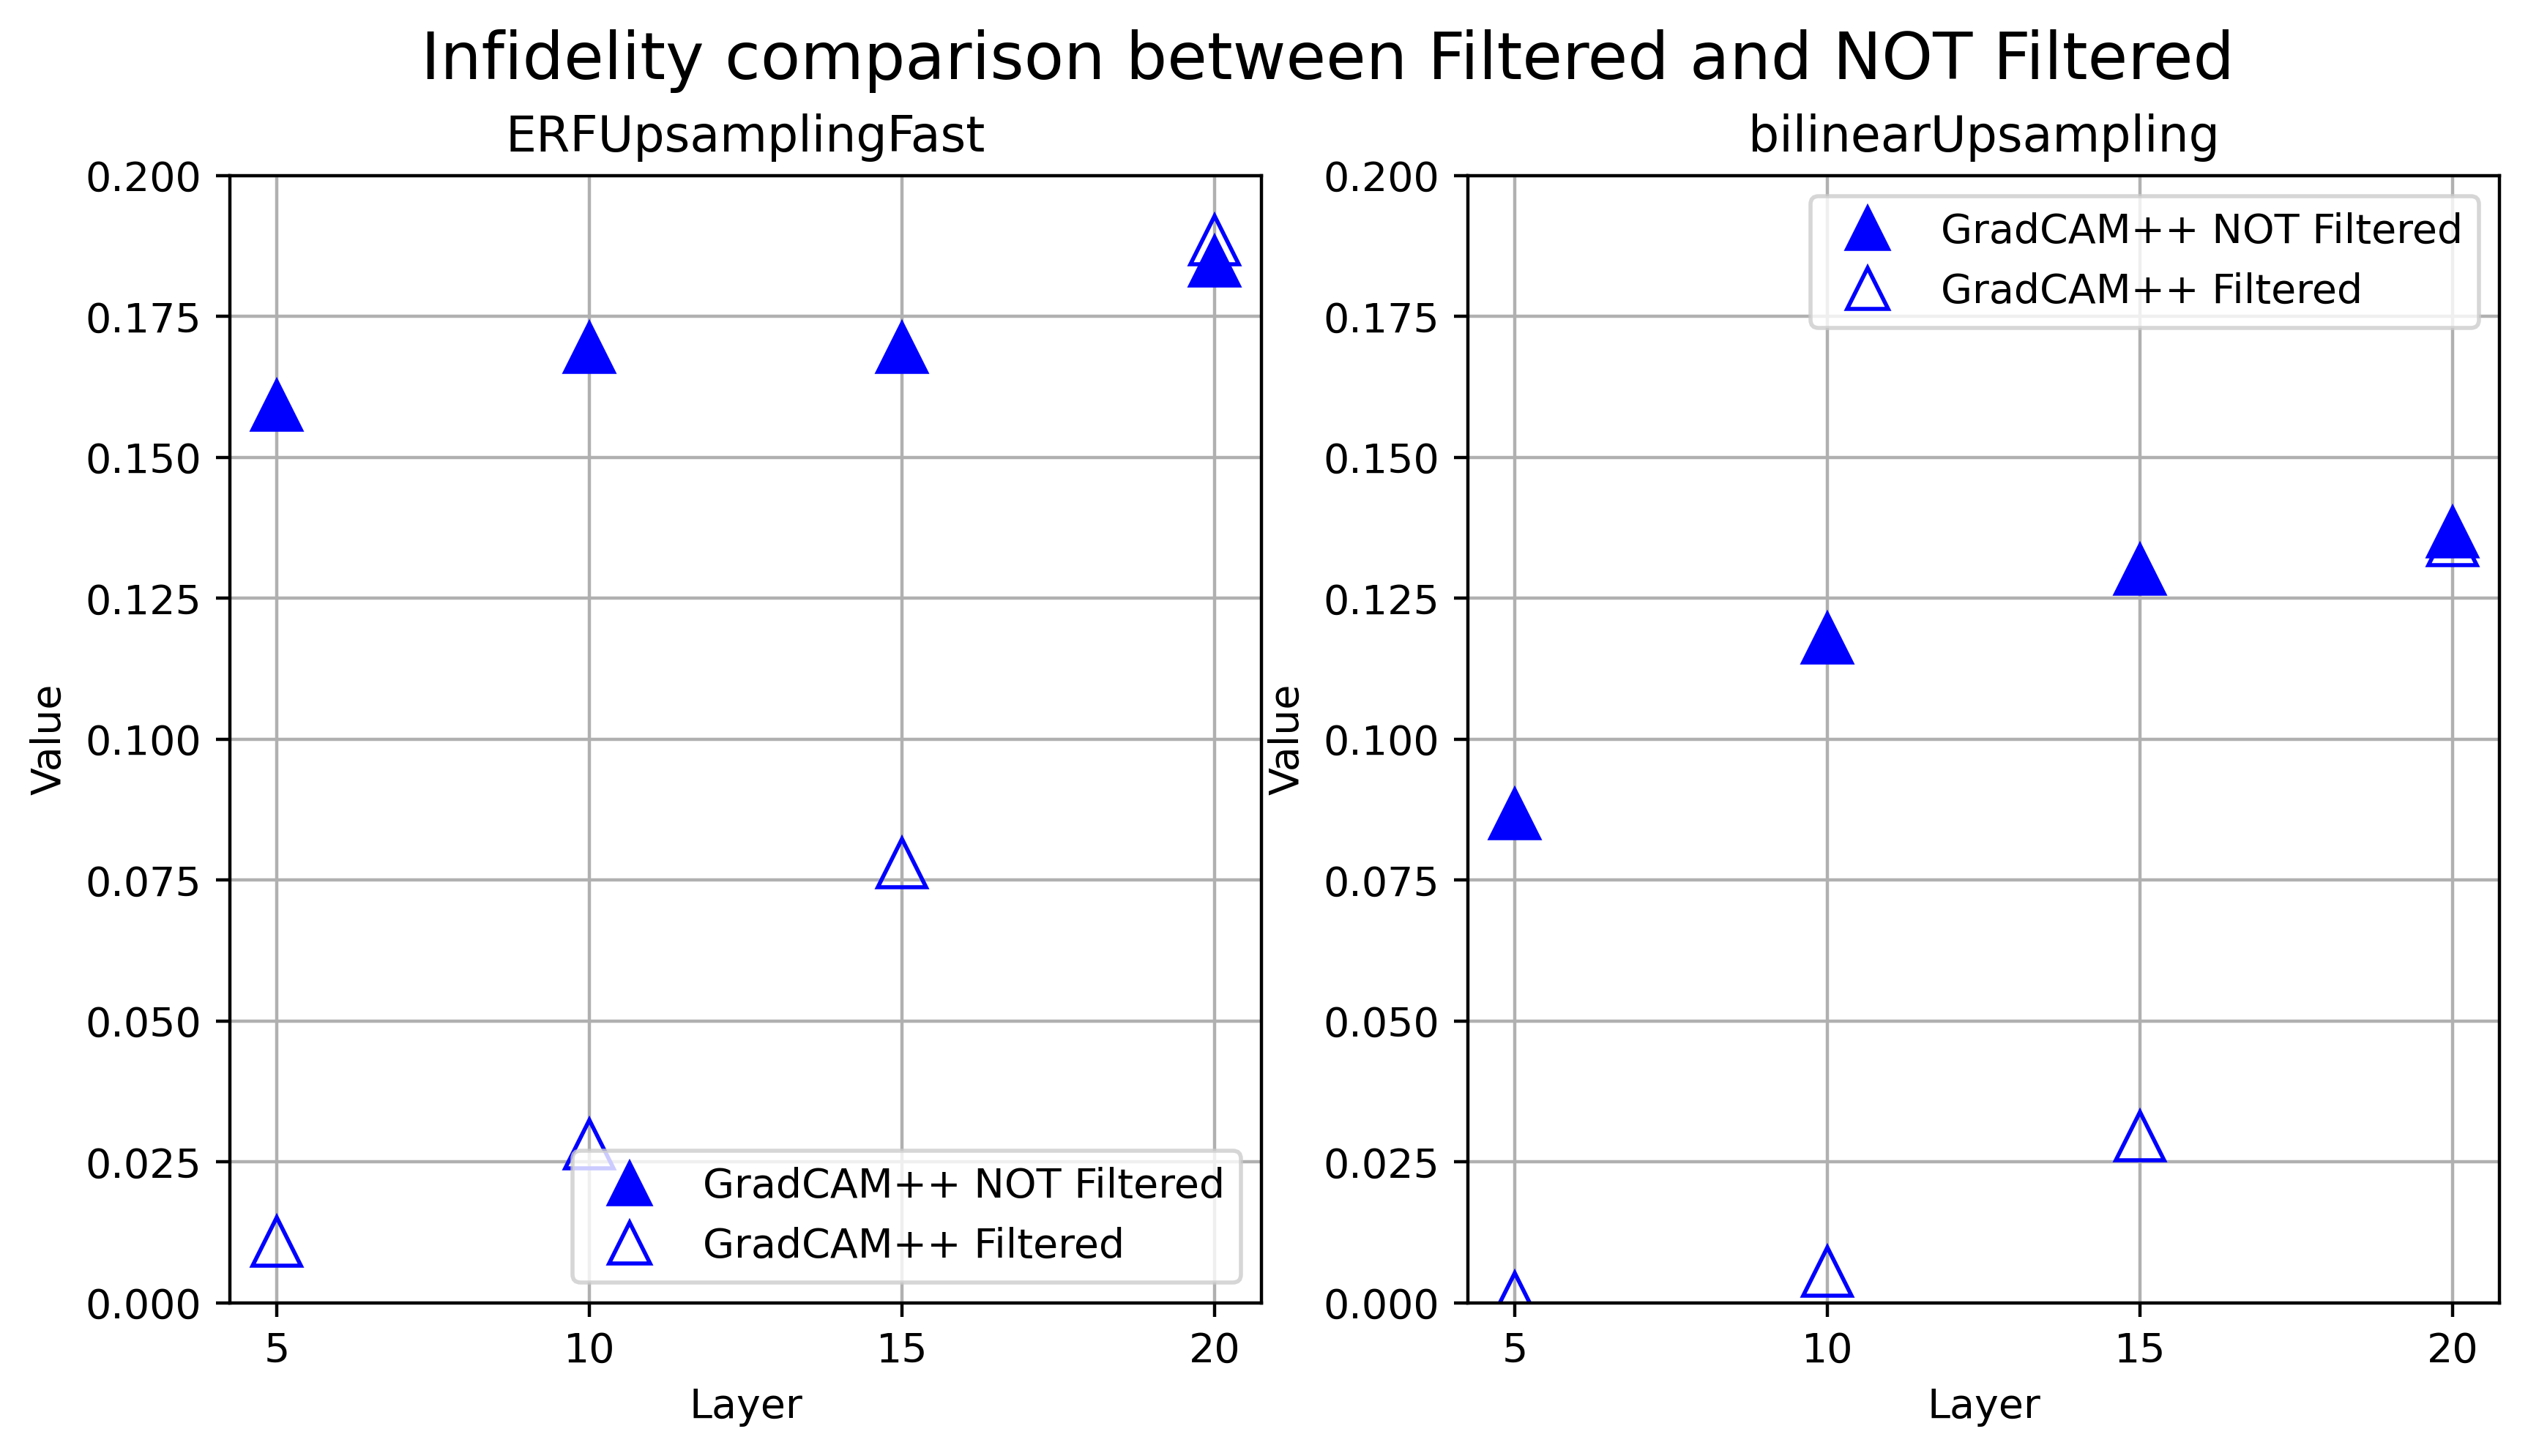

In [16]:
import matplotlib.lines as mlines


color_for_layers = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
# shape_for_upscale = {"ERFUpsampling": "P","SimpleUpsampling": "D"}  # Define shape mapping
shape_for_methods = {"GradCAMPlusPlus": "^"}  # Define shape mapping

method_names = {"GradCAMPlusPlus": r"GradCAM++ NOT Filtered", "DeepLiftShap8": "DeepLiftShap Bilinear Upsampling"}  # Define shape mapping
# upscale_names = {"ERFUpsampling": "ERF Upsampling", "SimpleUpsampling": "Bilinear Upsampling"}  # Define shape mapping
titles = {
    "sensitivity": "Sensitivity (Lower is Better)",
    "infidelity": "Infidelity (Lower is Better)",
    "road_combined": "ROAD (Higher is Better)",
}

fig = plt.figure(figsize=(10,5), dpi=400)

metric = "road_combined"
# fig.text(0.05, 0.75, 'GradCAM++', ha='center', va='center', fontsize=14) # , fontweight='bold')
# fig.text(0.05, 0.25, 'DeepLiftShap', ha='center', va='center', fontsize=14) # , fontweight='bold')

plt.suptitle('Infidelity comparison between Filtered and NOT Filtered', fontsize=16)
plt.tight_layout()

for index, upscale in enumerate(upscale_methods):
    print(upscale)
    plt.subplot(1, 2, index + 1)
    plt.title(upscale)
    for metric in metrics:
        for layer_type in types:
            for mix in mixing_methods:
                for j, attr_method in enumerate(methods):
                    res = df[(df["Upscale Method"] == upscale) &
                            (df["Metric"] == metric) &
                            (df["Attribution Method"] == attr_method) & 
                            (df["Mixing Method"] == mix)]
                    res = res.groupby("Layer").agg({"Value": ["mean","std","count"]}).reset_index()
                    res["Layer"] = res["Layer"].apply(lambda x: int(x.split(".")[-1]))
                    print(res.columns)
                    # Extract also the value std
                    # print(res)
                    # values = [res[res["Layer"] == f"features.{i}"]["Value"].values[0] for i in [5,10,15,20]]
                    # for i in [5,10,15,20]:
                    #     print(res[res["Layer"] == f"features.{i}"]["Value"].values[0])
                    # print(res)
                    # indices = res["Layer"].apply(lambda x: int(x.split(".")[-1]))
                    # print(indices)
                    # indices = [i for i in indices if i >= 10]
                    # values = [res[res["Layer"] == f"features.{l}"]["Value"].values[0] for l in range(21)]
                    # values = [res[res["Layer"] == f"features.{l}"]["Value"].values[0] for l in indices]
                    # Average the values across each layer
                    # for i in [5,10,15,20]:
                    #     print(values[indices == i])
                    # print(mix)
                    # print(values)
                    # print(indices)
                    # print(shape_for_methods)
                    # print(attr_method)
                    # print(shape_for_methods[attr_method])
                    if mix == "MultiplierMix":
                        # print("SimpleUpsampling")
                        plt.plot(res["Layer"], res["Value","mean"],shape_for_methods[attr_method],markerfacecolor= 'none', color=color_for_layers[types.index(layer_type)], markersize=12)
                        # plt.errorbar(res["Layer"], res["Value","mean"], yerr=1.96 * res["Value","std"] / res["Value","count"], fmt='o', color=color_for_layers[types.index(layer_type)], markersize=2, capsize=2)
                    else:
                        plt.plot(res["Layer"], res["Value","mean"],shape_for_methods[attr_method], color=color_for_layers[types.index(layer_type)], markersize=12)
                        # plt.errorbar(res["Layer"], res["Value","mean"], yerr=1.96 * res["Value","std"] / res["Value","count"], fmt='o', color=color_for_layers[types.index(layer_type)], markersize=2, capsize=2)
                        # print("ERFUpsampling")

                    plt.xlabel("Layer")
                    plt.ylabel("Value")
                    # Log scale for y
                    if metric == "sensitivity":
                        plt.yscale("log")

                    plt.ylim([0, 0.2])
                    plt.grid(True)


    # Create color legend (Layer Types)
    # color_legend = [mlines.Line2D([], [], color=color, marker='s', linestyle='None', markersize=10, label=layer) 
    #                 for color, layer in zip(color_for_layers, types)]
    color_legend = []

    # Create shape legend (Methods)
    shape_legend = [mlines.Line2D([], [], color='blue', marker=shape, linestyle='None', markersize=10, label=method_names[upscale]) 
                    for upscale, shape in shape_for_methods.items()]
    
    upscale_legend = [mlines.Line2D([], [], color='blue', marker='^', linestyle='None', markersize=10, label="GradCAM++ Filtered", markerfacecolor= 'none'),]
    
    plt.xticks([5,10,15,20])
    plt.legend(handles=color_legend + shape_legend + upscale_legend)

plt.savefig('results filter infidelity.pdf', dpi=400, bbox_inches='tight')


      Image Index  Label  Predicted Label  Model         Dataset  \
0               0      2                2  VGG11  Imagenettewoof   
1               0      2                2  VGG11  Imagenettewoof   
2               0      2                2  VGG11  Imagenettewoof   
3               0      2                2  VGG11  Imagenettewoof   
4               0      2                2  VGG11  Imagenettewoof   
...           ...    ...              ...    ...             ...   
7995          999     19               19  VGG11  Imagenettewoof   
7996          999     19               19  VGG11  Imagenettewoof   
7997          999     19               19  VGG11  Imagenettewoof   
7998          999     19               19  VGG11  Imagenettewoof   
7999          999     19               19  VGG11  Imagenettewoof   

     Attribution Method        Layer      Metric      Upscale Method  \
0       GradCAMPlusPlus  features.10  infidelity   ERFUpsamplingFast   
1       GradCAMPlusPlus  features.10  i

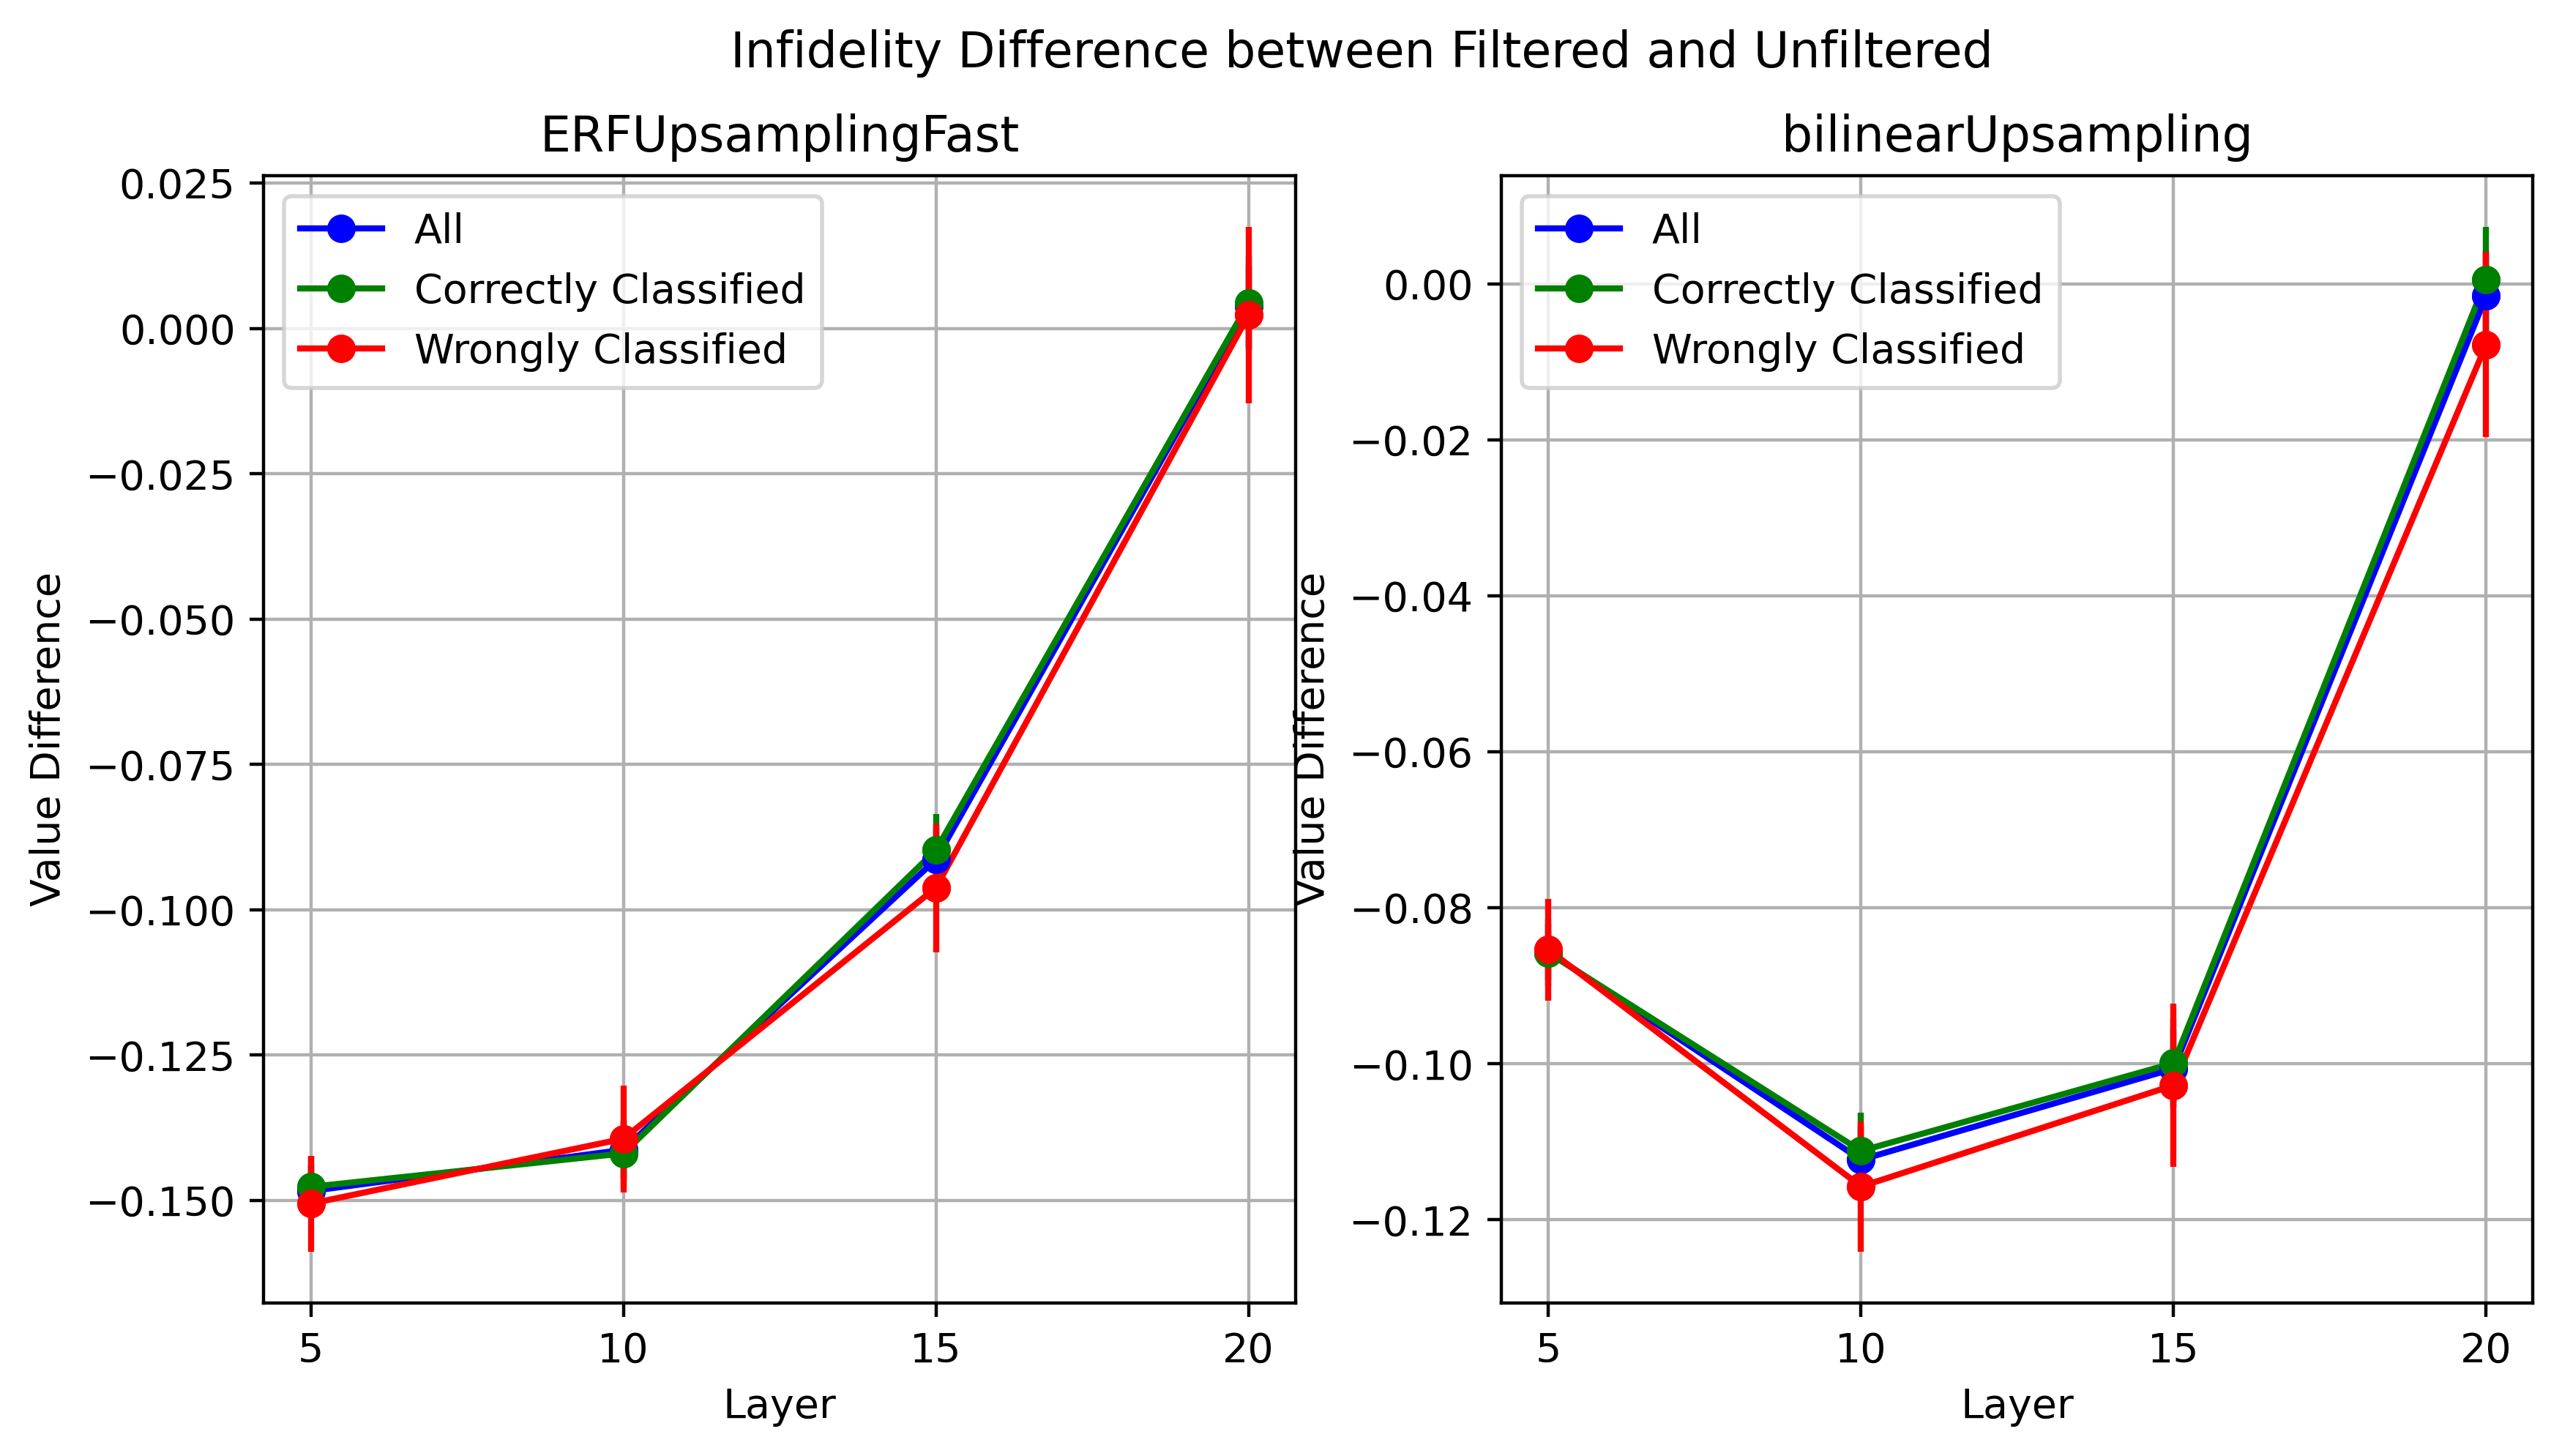

In [15]:
# Plot the grouped data showing also the 95% confidence interval
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

import numpy as np


# Function to calculate the difference in 'Value' for each group
def calculate_difference(group):
    if len(group) == 2:
        # Assuming there are exactly two rows in each group with different 'Mixing Method'
        diff = group['Value'].diff().iloc[1]
        return pd.Series([diff], index=['Value Difference'])
    else:
        return pd.Series([None], index=['Value Difference'])


# Apply the function to each group and reset the index
# display(grouped)

plt.figure(figsize=(10,5), dpi=400)
plt.suptitle("Infidelity Difference between Filtered and Unfiltered")
# plt.xlabel("Layer")
# plt.ylabel("Value Difference")
# plt.xticks([5,10,15,20])
# plt.ylim([-0.1, 0.4])
# plt.grid(True)
# Plot data

grouped = df.groupby([col for col in df.columns if col not in ['Mixing Method', 'Value']])

df_correct = df[df["Predicted Label"] == df["Label"]]
grouped_correct = df_correct.groupby([col for col in df_correct.columns if col not in ['Mixing Method', 'Value']])

df_wrong = df[df["Predicted Label"] != df["Label"]]
grouped_wrong = df_wrong.groupby([col for col in df_wrong.columns if col not in ['Mixing Method', 'Value']])

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
labels = ['All', 'Correctly Classified', 'Wrongly Classified']

for index, upscale in enumerate(upscale_methods):
    plt.subplot(1, 2, index + 1)
    plt.title(upscale)
    plt.grid(True)
    plt.xlabel("Layer")
    plt.ylabel("Value Difference")
    # plt.ylim([-0.01, 0.12])
    plt.xticks([5,10,15,20])
    for index, d in enumerate([grouped, grouped_correct, grouped_wrong]): 
        d = d.apply(calculate_difference).reset_index()
        print(d)
        d = d[d["Upscale Method"] == upscale]        
        d = d.groupby(["Layer"]).agg({"Value Difference": ["mean","std", "count"]}).reset_index()
        d["Layer"] = d["Layer"].apply(lambda x: int(x.split(".")[-1]))
        d = d.sort_values(by="Layer")
        plt.plot(d["Layer"], d['Value Difference']['mean'], marker='o', label=labels[index], color=colors[index])
        for i, row in d.iterrows():
            layer = int(row['Layer'].values[0])
            mean_diff = row['Value Difference']['mean']
            std_diff = 1.96*row['Value Difference']['std'] / np.sqrt(row['Value Difference']['count'])

            # Plot the mean difference with error bars
            plt.errorbar(layer, mean_diff, yerr=std_diff, fmt='o', color=colors[index])

    plt.legend()

plt.savefig('results mixed difference infidelity.pdf', dpi=400, bbox_inches='tight')